# SQL Murder Mystery Practice (SQLite_to_MySQL)

---

File Sources: 
<Br>https://www.kaggle.com/datasets/johnp47/sql-murder-mystery-database
<Br>http://mystery.knightlab.com/

## Problem Description

A crime has taken place and the detective needs your help. The detective gave you the crime scene report, but you somehow lost it. You vaguely remember that the crime was a ​murder​ that occurred sometime on ​Jan.15, 2018​ and that it took place in ​SQL City​. Start by retrieving the corresponding crime scene report from the police department’s database.

## Murder Mystery Relational Database Table Schema

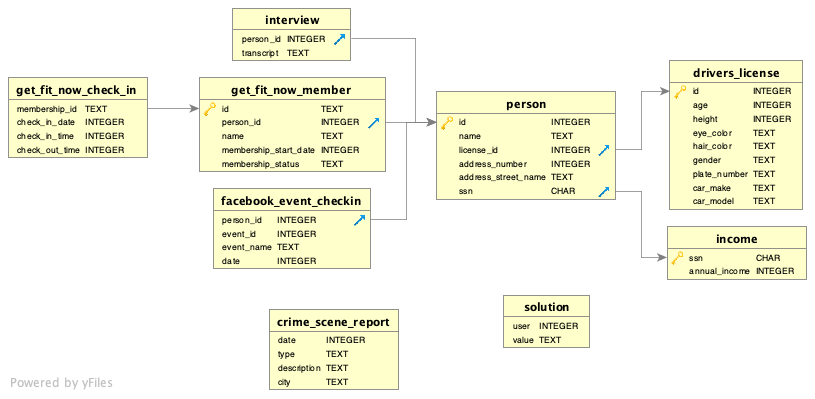

---

## Import Necessary Libraries

In [1]:
import pandas as pd
import sqlite3
import mysql.connector

## Connect Databases

In [2]:
# Connecting SqLite .db File To Python
sqlite_conn = sqlite3.connect("sql-murder-mystery.db")

In [3]:
# connecting MySQL Database To Python
mysql_conn = mysql.connector.connect(
    host = "localhost",
    user="root",
    password="root",
    database="sql_city",
    consume_results=True
)

In [4]:
mysql_cursor = mysql_conn.cursor(buffered=True)

## Read Informations From SQLite and Write Them To MySQL Database

There are 9 tables as listed below;
- crime_scene_report
- drivers_license
- person
- facebook_event_checkin
- interview
- get_fit_now_member
- get_fit_now_check_in
- income
- solution

### 1. crime_scene_report

In [5]:
# Read data from SQLite Database
crime_scene_report = pd.read_sql_query("SELECT * FROM crime_scene_report", sqlite_conn)
crime_scene_report.head()

,date,type,description,city
0,20180115,robbery,A Man Dressed as Spider-Man Is on a Robbery Spree,NYC
1,20180115,murder,Life? Dont talk to me about life.,Albany
2,20180115,murder,"Mama, I killed a man, put a gun against his he...",Reno
3,20180215,murder,REDACTED REDACTED REDACTED,SQL City
4,20180215,murder,Someone killed the guard! He took an arrow to ...,SQL City


In [6]:
# Write data to MySQL Database
for i in crime_scene_report.index:
    
    v1 = int(crime_scene_report.loc[i,'date'])
    v2 = crime_scene_report.loc[i,'type']
    v3 = crime_scene_report.loc[i,'description']
    v4 = crime_scene_report.loc[i,'city']

    mysql_cursor.execute("INSERT INTO crime_scene_report (date, type, description, city) VALUES (%s, %s, %s, %s)", (v1, v2, v3, v4))
    
mysql_conn.commit()

---

### 2. drivers_license

In [7]:
# Read data from SQLite Database
drivers_license = pd.read_sql_query("SELECT * FROM drivers_license", sqlite_conn)
drivers_license.head()

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,100280,72,57,brown,red,male,P24L4U,Acura,MDX
1,100460,63,72,brown,brown,female,XF02T6,Cadillac,SRX
2,101029,62,74,green,green,female,VKY5KR,Scion,xB
3,101198,43,54,amber,brown,female,Y5NZ08,Nissan,Rogue
4,101255,18,79,blue,grey,female,5162Z1,Lexus,GS


In [8]:
# Write data to MySQL Database
for i in drivers_license.index:
    v1 = int(drivers_license.loc[i, 'id'])
    v2 = int(drivers_license.loc[i, 'age'])
    v3 = int(drivers_license.loc[i, 'height'])
    v4 = drivers_license.loc[i, 'eye_color']
    v5 = drivers_license.loc[i, 'hair_color']
    v6 = drivers_license.loc[i, 'gender']
    v7 = drivers_license.loc[i, 'plate_number']
    v8 = drivers_license.loc[i, 'car_make']
    v9 = drivers_license.loc[i, 'car_model']
    
    mysql_cursor.execute("INSERT INTO drivers_license (id, age, height, eye_color, hair_color, gender, plate_number, car_make, car_model) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)", (v1, v2, v3, v4, v5, v6, v7, v8, v9))
    
mysql_conn.commit()

---

### 3. person

In [9]:
# Read data from SQLite Database
person = pd.read_sql_query("SELECT * FROM person", sqlite_conn)
person.head()

,id,name,license_id,address_number,address_street_name,ssn
0,10000,Christoper Peteuil,993845,624,Bankhall Ave,747714076
1,10007,Kourtney Calderwood,861794,2791,Gustavus Blvd,477972044
2,10010,Muoi Cary,385336,741,Northwestern Dr,828638512
3,10016,Era Moselle,431897,1987,Wood Glade St,614621061
4,10025,Trena Hornby,550890,276,Daws Hill Way,223877684


In [10]:
# Data Writing Problem Solving Statement For The person Table
mysql_cursor.execute("SET FOREIGN_KEY_CHECKS = 0")
mysql_conn.commit()

In [11]:
# Write data to MySQL Database
for i in person.index:
    v1 = int(person.loc[i,'id'])
    v2 = person.loc[i, 'name']
    v3 = int(person.loc[i,'license_id'])
    v4 = int(person.loc[i,'address_number'])
    v5 = person.loc[i, 'address_street_name']
    v6 = int(person.loc[i,'ssn'])
    
    mysql_cursor.execute("INSERT INTO person (id, name, license_id, address_number, address_street_name, ssn) VALUES (%s, %s, %s, %s, %s, %s)", (v1, v2, v3, v4, v5, v6))
    
mysql_conn.commit()

---

### 4. facebook_event_checkin

In [12]:
# Read data from SQLite Database
facebook_event_checkin = pd.read_sql_query("SELECT * FROM facebook_event_checkin", sqlite_conn)
facebook_event_checkin.head()

,person_id,event_id,event_name,date
0,28508,5880,Nudists are people who wear one-button suits.\n,20170913
1,63713,3865,but that's because it's the best book on anyth...,20171009
2,63713,3999,"If Murphy's Law can go wrong, it will.\n",20170502
3,63713,6436,Old programmers never die. They just branch t...,20170926
4,82998,4470,Help a swallow land at Capistrano.\n,20171022


In [13]:
# Write data to MySQL Database
for i in facebook_event_checkin.index:
    v1 = int(facebook_event_checkin.loc[i, 'person_id'])
    v2 = int(facebook_event_checkin.loc[i, 'event_id'])
    v3 = facebook_event_checkin.loc[i, 'event_name']
    v4 = int(facebook_event_checkin.loc[i, 'date'])
    
    mysql_cursor.execute("INSERT INTO facebook_event_checkin (person_id, event_id, event_name, date) VALUES (%s, %s, %s, %s)", (v1, v2, v3, v4))

mysql_conn.commit()

---

### 5. interview

In [14]:
# Read data from SQLite Database
interview = pd.read_sql_query("SELECT * FROM interview", sqlite_conn)
interview.head()

,person_id,transcript
0,28508,‘I deny it!’ said the March Hare.\n
1,63713,\n
2,86208,"way, and the whole party swam to the shore.\n"
3,35267,"lessons in here? Why, there’s hardly room for ..."
4,33856,\n


In [15]:
# Write data to MySQL Database
for i in interview.index:
    v1 = int(interview.loc[i, 'person_id'])
    v2 = interview.loc[i, 'transcript']
    
    mysql_cursor.execute("INSERT INTO interview (person_id, transcript) VALUES (%s, %s)", (v1, v2))
    
mysql_conn.commit()

---

### 6. get_fit_now_member

In [16]:
# Read data from SQLite Database
get_fit_now_member = pd.read_sql_query("SELECT * FROM get_fit_now_member", sqlite_conn)
get_fit_now_member.head()

,id,person_id,name,membership_start_date,membership_status
0,NL318,65076,Everette Koepke,20170926,gold
1,AOE21,39426,Noe Locascio,20171005,regular
2,2PN28,63823,Jeromy Heitschmidt,20180215,silver
3,0YJ24,80651,Waneta Wellard,20171206,gold
4,3A08L,32858,Mei Bianchin,20170401,silver


In [17]:
# Write data to MySQL Database
for i in get_fit_now_member.index:
    v1 = get_fit_now_member.loc[i, 'id']
    v2 = int(get_fit_now_member.loc[i, 'person_id'])
    v3 = get_fit_now_member.loc[i, 'name']
    v4 = int(get_fit_now_member.loc[i, 'membership_start_date'])
    v5 = get_fit_now_member.loc[i, 'membership_status']
    
    mysql_cursor.execute("INSERT INTO get_fit_now_member (id, person_id, name, membership_start_date, membership_status) VALUES (%s, %s, %s, %s, %s)", (v1, v2, v3, v4, v5))
    
mysql_conn.commit()

---

### 7. get_fit_now_check_in

In [18]:
# Read data from SQLite Database
get_fit_now_check_in = pd.read_sql_query("SELECT * FROM get_fit_now_check_in", sqlite_conn)
get_fit_now_check_in.head()

,membership_id,check_in_date,check_in_time,check_out_time
0,NL318,20180212,329,365
1,NL318,20170811,469,920
2,NL318,20180429,506,554
3,NL318,20180128,124,759
4,NL318,20171027,418,1019


In [19]:
# Write data to MySQL Database
for i in get_fit_now_check_in.index:
    v1 = get_fit_now_check_in.loc[i, 'membership_id']
    v2 = int(get_fit_now_check_in.loc[i, 'check_in_date'])
    v3 = int(get_fit_now_check_in.loc[i, 'check_in_time'])
    v4 = int(get_fit_now_check_in.loc[i, 'check_out_time'])
    
    mysql_cursor.execute("INSERT INTO get_fit_now_check_in (membership_id, check_in_date, check_in_time, check_out_time) VALUES (%s, %s, %s, %s) ", (v1, v2, v3, v4))
    
mysql_conn.commit()

---

### 8. income

In [20]:
# Read data from SQLite Database
income = pd.read_sql_query("SELECT * FROM income", sqlite_conn)
income.head()

,ssn,annual_income
0,100009868,52200
1,100169584,64500
2,100300433,74400
3,100355733,35900
4,100366269,73000


In [21]:
# Write data to MySQL Database
for i in income.index:
    v1 = int(income.loc[i,'ssn'])
    v2 = int(income.loc[i, 'annual_income'])
    
    mysql_cursor.execute("INSERT INTO income (ssn, annual_income) VALUES (%s, %s)", (v1, v2))
    
mysql_conn.commit()

---

### 9. solution

In [22]:
# Read data from SQLite Database
solution = pd.read_sql_query("SELECT * FROM sqlite_master", sqlite_conn)
print(solution.loc[10,'sql'])

CREATE TRIGGER check_solution AFTER INSERT ON solution
    WHEN new.user==1
    BEGIN
        DELETE FROM solution;
        INSERT INTO solution VALUES (0,
        CASE WHEN hex(new.value)=='4A6572656D7920426F77657273' THEN "Congrats, you found the murderer! But wait, there's more... If you think you're up for a challenge, try querying the interview transcript of the murderer to find the real villain behind this crime. If you feel especially confident in your SQL skills, try to complete this final step with no more than 2 queries. Use this same INSERT statement with your new suspect to check your answer."
             WHEN hex(new.value)=='4D6972616E6461205072696573746C79' THEN "Congrats, you found the brains behind the murder! Everyone in SQL City hails you as the greatest SQL detective of all time. Time to break out the champagne!"
             ELSE "That's not the right person. Try again!"
        END
        );
    END


In [23]:
# Write data to MySQL Database

mysql_cursor.execute("INSERT INTO solutions (user, value) VALUES ('4A6572656D7920426F77657273', 'Congrats, you found the murderer! But wait, there is more... If you think you are up for a challenge, try querying the interview transcript of the murderer to find the real villain behind this crime. If you feel especially confident in your SQL skills, try to complete this final step with no more than 2 queries.')")
mysql_cursor.execute("INSERT INTO solutions (user, value) VALUES ('4D6972616E6461205072696573746C79', 'Congrats, you found the brains behind the murder! Everyone in SQL City hails you as the greatest SQL detective of all time. Time to break out the champagne!')")
mysql_cursor.execute("INSERT INTO solutions (user, value) VALUES ('4E45494E', 'That is not the right person. Try again!')")
 
mysql_conn.commit()

---

### Close The Database Connection

In [24]:
mysql_cursor.close()
mysql_conn.close()

---